<a href="https://colab.research.google.com/github/Kaiziferr/machine_learning/blob/main/clusters/06_DBSCAN_test_concept.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import DBSCAN
from sklearn.datasets import (
    make_blobs,
    make_moons,
    make_circles,
    make_regression)

from sklearn.metrics import silhouette_score

# **Info**
---

@By: Steven Bernal

@Nickname: Kaiziferr

@Git: https://github.com/Kaiziferr

# **Config**
---

In [2]:
sns.set(style="darkgrid")
warnings.simplefilter("ignore")
paleta = sns.color_palette("tab10").as_hex()

random_seed = 73

# **Generar Data**
---

In [3]:
n_samples = 500

In [4]:
data_gen = None
for i in range(8):
  X, y = None, None
  transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
  match i:
    case 0:
      X, y = make_circles(n_samples=n_samples, noise=0.099, factor=0.05, random_state=random_seed)
    case 1:
      X, y = make_moons(n_samples=n_samples, noise=0.09, random_state=random_seed)
    case 3:
      X, y =  make_blobs(n_samples=n_samples, random_state=random_seed)
    case 4:
      X, y =  make_blobs(n_samples=n_samples, random_state=random_seed)
      X = X_transform = np.dot(X, transformation)
    case 5:
      X, y =  make_blobs(n_samples=n_samples, cluster_std=[4.5,9, 1.5], random_state=random_seed)
    case 6:
      rng = np.random.RandomState(n_samples)
      no_structure = rng.rand(n_samples, 3)
      no_structure[:,2] = np.where(no_structure[:,2] < 0.2, 1, no_structure[:,2])
      no_structure[:,2] = np.where(no_structure[:,2] < 0.85, 2, no_structure[:,2])
      no_structure[:,2] = np.where(no_structure[:,2] < 1, 0, no_structure[:,2])
      X, y = no_structure[:,0:2], no_structure[:,2]

  if X is not None :
    data = np.concatenate((X, y.reshape(y.shape[0], 1)), axis=1)
    if data_gen is None:
      data_gen = data
    else:
      data_gen = np.concatenate((data_gen, data), axis=1)

data=pd.DataFrame(data_gen, columns=[
    'c1', 'c2', 'yc',
    'l1', 'l2', 'yl',
    'd1', 'd2', 'yd',
    'a1', 'a2', 'ya',
    'v1', 'v2', 'yv',
    't1', 't2', 'yt'

])

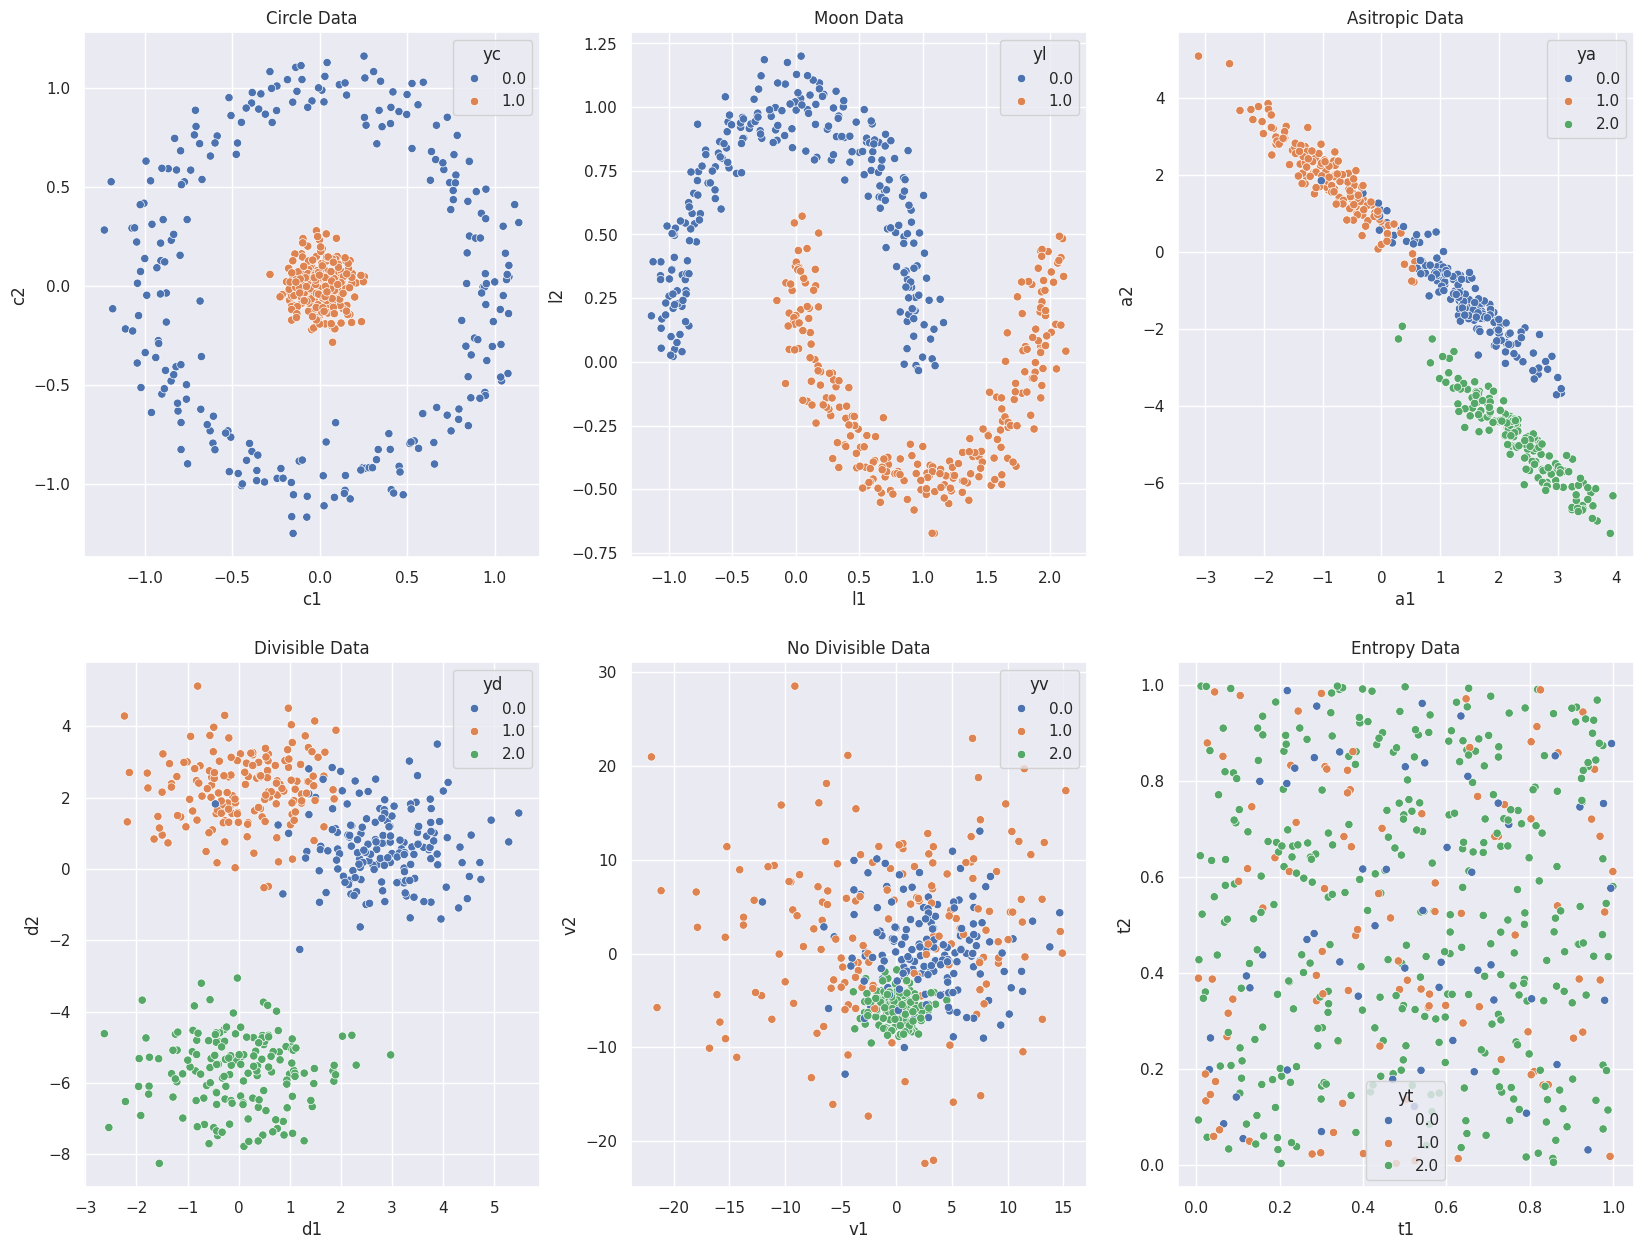

In [5]:
fig, ax = plt.subplots(2, 3,  figsize=(20, 15))
sns.scatterplot(data=data, x="c1", y="c2", palette="deep", hue='yc', ax=ax[0,0])
ax[0,0].set_title('Circle Data')
sns.scatterplot(data=data, x="l1", y="l2", palette="deep", hue='yl', ax=ax[0,1])
ax[0,1].set_title('Moon Data')
sns.scatterplot(data=data, x="a1", y="a2", palette="deep", hue='ya', ax=ax[0,2])
ax[0,2].set_title('Asitropic Data')
sns.scatterplot(data=data, x="d1", y="d2", palette="deep", hue='yd', ax=ax[1,0])
ax[1,0].set_title('Divisible Data')
sns.scatterplot(data=data, x="v1", y="v2", palette="deep", hue='yv', ax=ax[1,1])
ax[1,1].set_title('No Divisible Data')
sns.scatterplot(data=data, x="t1", y="t2", palette="deep", hue='yt', ax=ax[1,2])
ax[1,2].set_title('Entropy Data')
plt.show()

In [6]:
from itertools import product


def select_params_dbscam(data, eps_values:list, min_samples:list, metrica, **kwards):
  """select for params of DBSCAN"""
  dbscan_params = list(product(eps_values, min_samples))
  scoress = []
  for p in dbscan_params:
    try:
      y_pred = DBSCAN(eps = p[0], min_samples=p[1]).fit_predict(data)
      scoress.append(metrica(data, y_pred, **kwards))
    except:
      scoress.append(-1)

  df_params_tunning = pd.DataFrame.from_records(dbscan_params, columns = ['Eps', 'Min_Samples'])
  df_params_tunning = pd.DataFrame.from_records(dbscan_params, columns = ['Eps', 'Min_Samples'])
  df_params_tunning['sil_scores'] = scoress
  pivot_data = pd.pivot_table(df_params_tunning, values='sil_scores', index='Min_Samples', columns = 'Eps')
  fig, ax = plt.subplots(figsize=(18,6))
  sns.heatmap(pivot_data, annot=True, annot_kws={'size':10}, cmap = 'BrBG', ax = ax)



# **Circle Data**
---

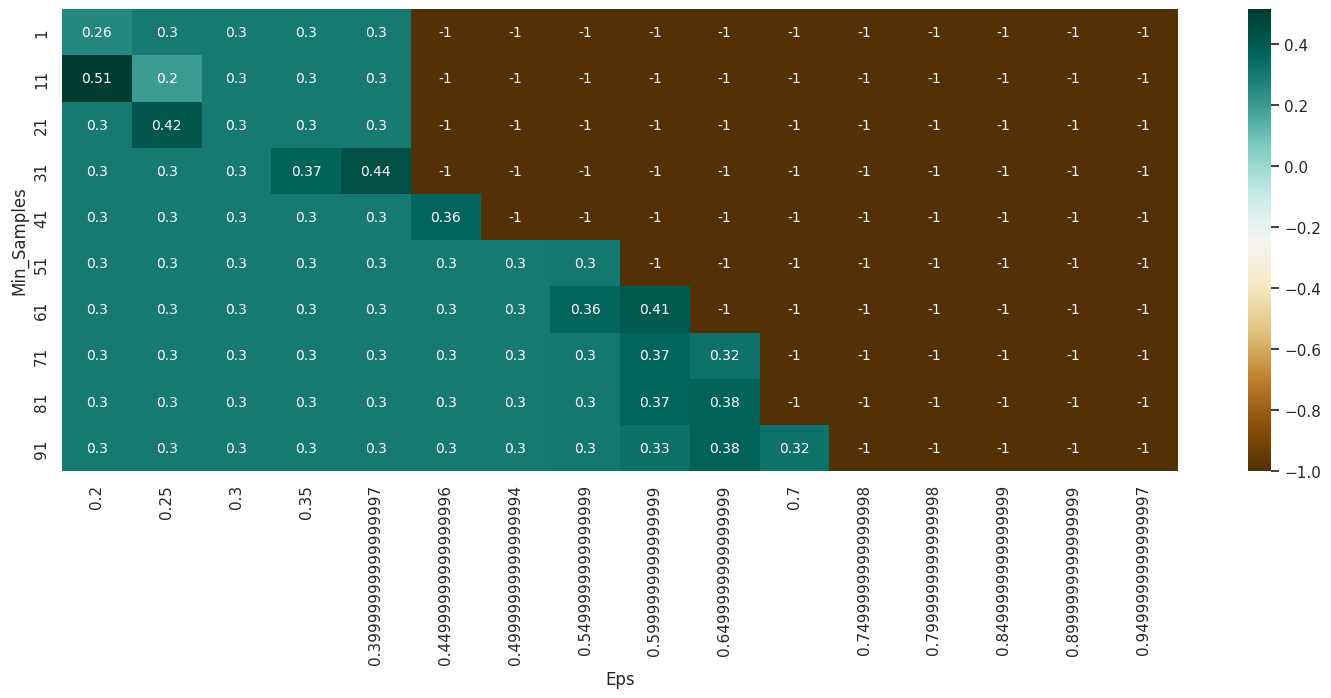

In [7]:
eps_values = np.arange(0.2, 0.99, 0.05)
min_samples = np.arange(1, 100, 10)
d_copy = data.iloc[:, :2].copy()
select_params_dbscam(
    d_copy,
    eps_values,
    min_samples,
    silhouette_score
)

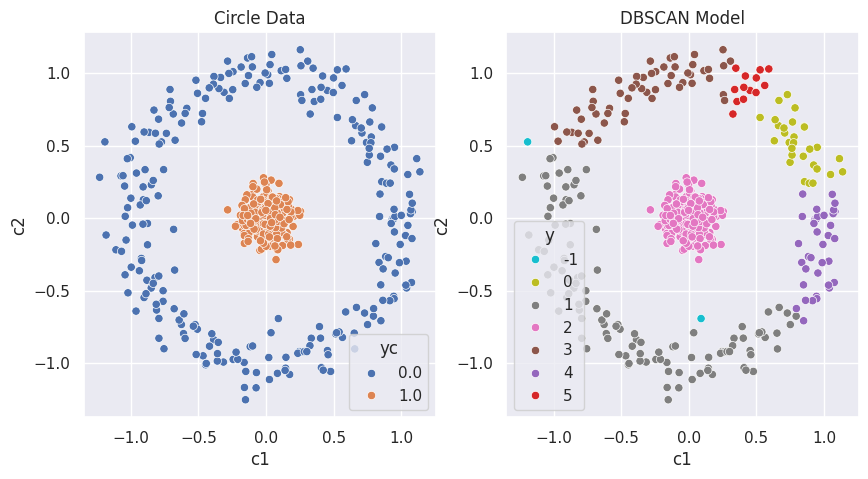

In [8]:
y_predict = DBSCAN(eps = 0.2, min_samples=11).fit_predict(d_copy)
d_copy['y'] = y_predict
fig, ax = plt.subplots(1, 2,  figsize=(10, 5))
sns.scatterplot(data=d_copy, x="c1", y="c2", palette=paleta[::-1], hue='y', ax=ax[1])
ax[1].set_title('DBSCAN Model')
sns.scatterplot(data=data, x="c1", y="c2", palette="deep", hue='yc', ax=ax[0])
ax[0].set_title('Circle Data')
plt.show()

# **Moon Data**
---

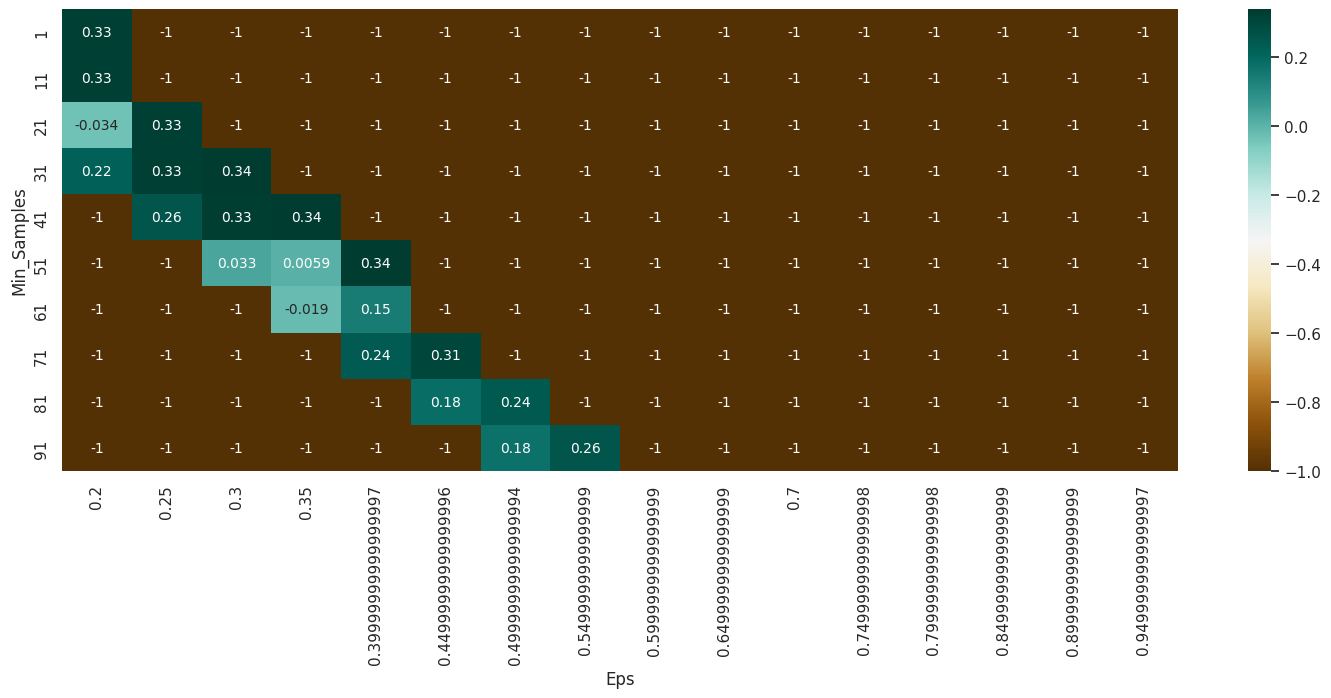

In [9]:
eps_values = np.arange(0.2, 0.99, 0.05)
min_samples = np.arange(1, 100, 10)
d_copy = data.iloc[:, 3:5].copy()
select_params_dbscam(
    d_copy,
    eps_values,
    min_samples,
    silhouette_score
)

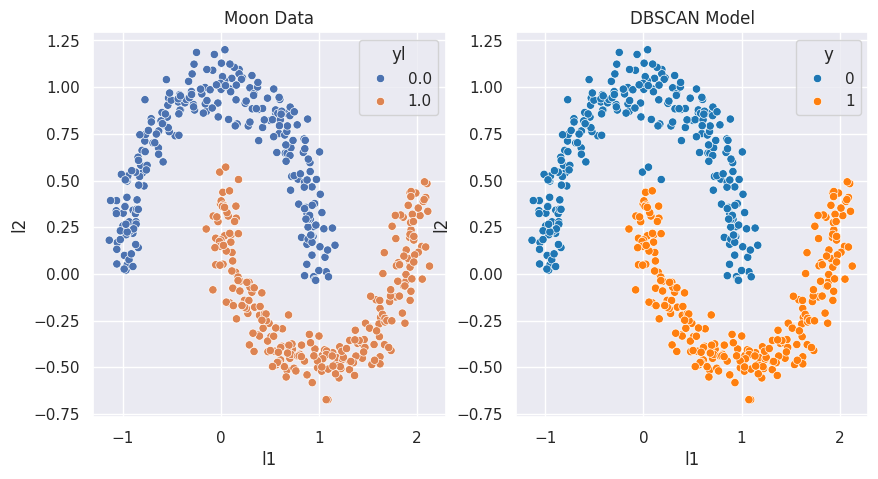

In [10]:
y_predict = DBSCAN(eps = 0.3, min_samples=31).fit_predict(d_copy)
d_copy['y'] = y_predict
fig, ax = plt.subplots(1, 2,  figsize=(10, 5))
sns.scatterplot(data=d_copy, x="l1", y="l2", palette=paleta, hue='y', ax=ax[1])
ax[1].set_title('DBSCAN Model')
sns.scatterplot(data=data, x="l1", y="l2", palette="deep", hue='yl', ax=ax[0])
ax[0].set_title('Moon Data')
plt.show()

# **Asitropic Data**
---

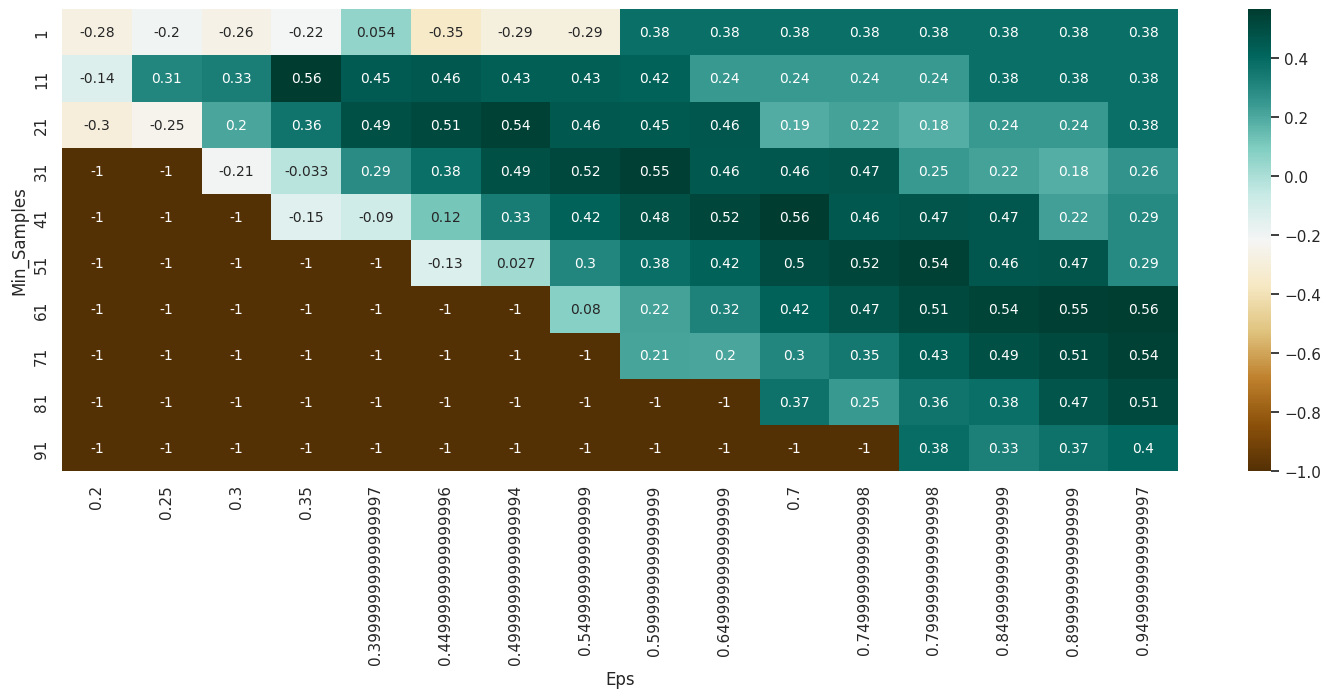

In [11]:
eps_values = np.arange(0.2, 0.99, 0.05)
min_samples = np.arange(1, 100, 10)
d_copy = data.iloc[:, 9:11].copy()
select_params_dbscam(
    d_copy,
    eps_values,
    min_samples,
    silhouette_score
)

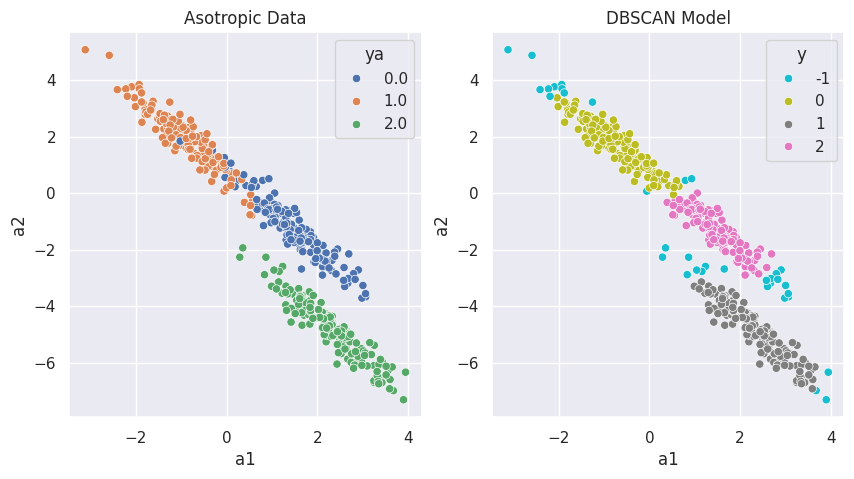

In [12]:
y_predict = DBSCAN(eps = 0.35, min_samples=11).fit_predict(d_copy)
d_copy['y'] = y_predict
fig, ax = plt.subplots(1, 2,  figsize=(10, 5))
sns.scatterplot(data=d_copy, x="a1", y="a2", palette=paleta[::-1], hue='y', ax=ax[1])
ax[1].set_title('DBSCAN Model')
sns.scatterplot(data=data, x="a1", y="a2", palette="deep", hue='ya', ax=ax[0])
ax[0].set_title('Asotropic Data')
plt.show()

# **Divisible Data**
---

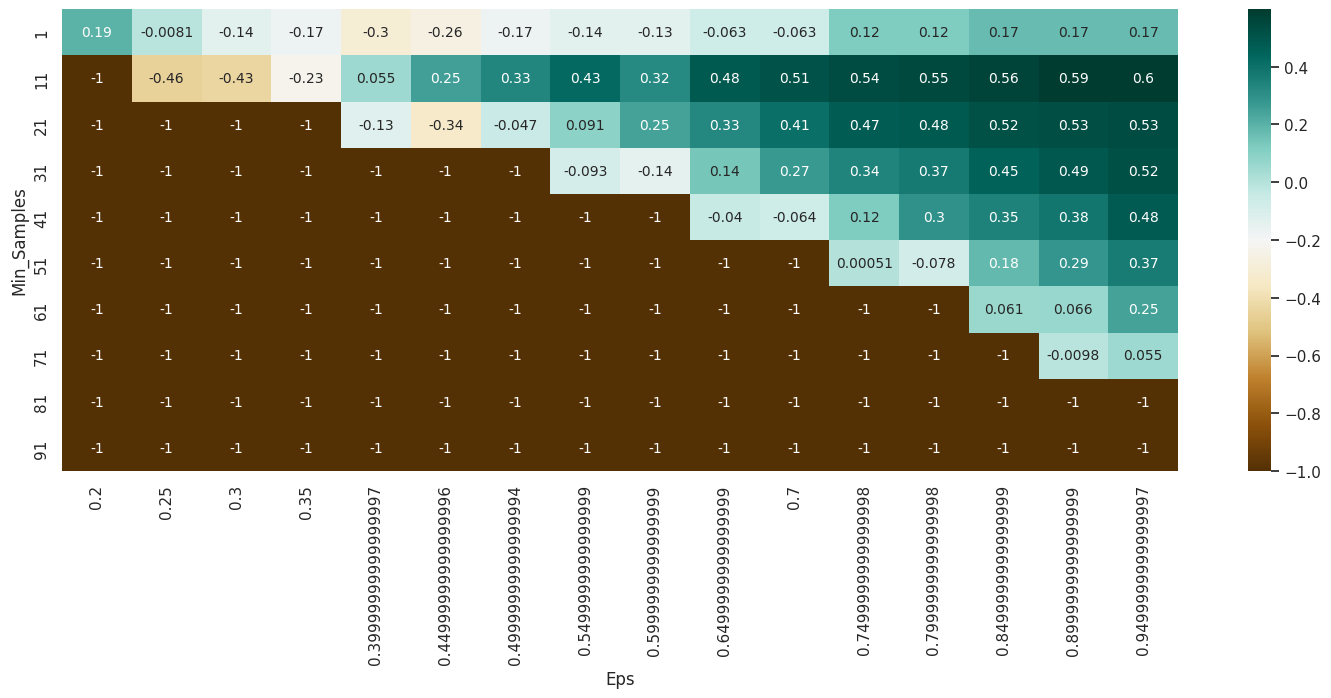

In [13]:
eps_values = np.arange(0.2, 0.99, 0.05)
min_samples = np.arange(1, 100, 10)
d_copy = data.iloc[:, 6:8].copy()
select_params_dbscam(
    d_copy,
    eps_values,
    min_samples,
    silhouette_score
)

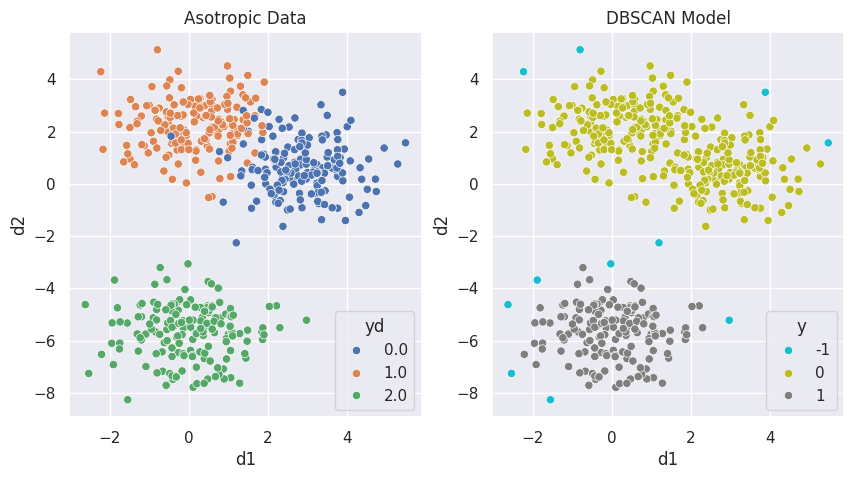

In [14]:
y_predict = DBSCAN(eps = 0.94, min_samples=11).fit_predict(d_copy)
d_copy['y'] = y_predict
fig, ax = plt.subplots(1, 2,  figsize=(10, 5))
sns.scatterplot(data=d_copy, x="d1", y="d2", palette=paleta[::-1], hue='y', ax=ax[1])
ax[1].set_title('DBSCAN Model')
sns.scatterplot(data=data, x="d1", y="d2", palette="deep", hue='yd', ax=ax[0])
ax[0].set_title('Asotropic Data')
plt.show()

# **No Divisible Data**
---

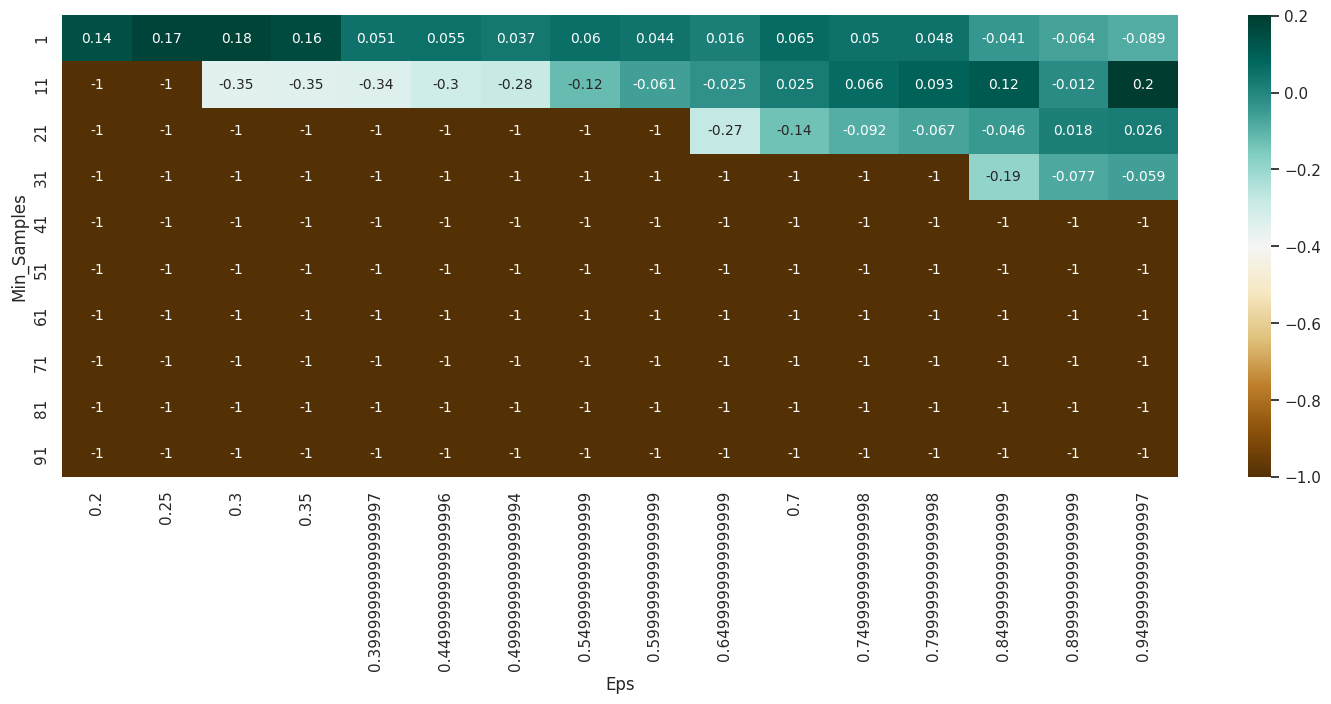

In [15]:
eps_values = np.arange(0.2, 0.99, 0.05)
min_samples = np.arange(1, 100, 10)
d_copy = data.iloc[:, 12:14].copy()
select_params_dbscam(
    d_copy,
    eps_values,
    min_samples,
    silhouette_score
)

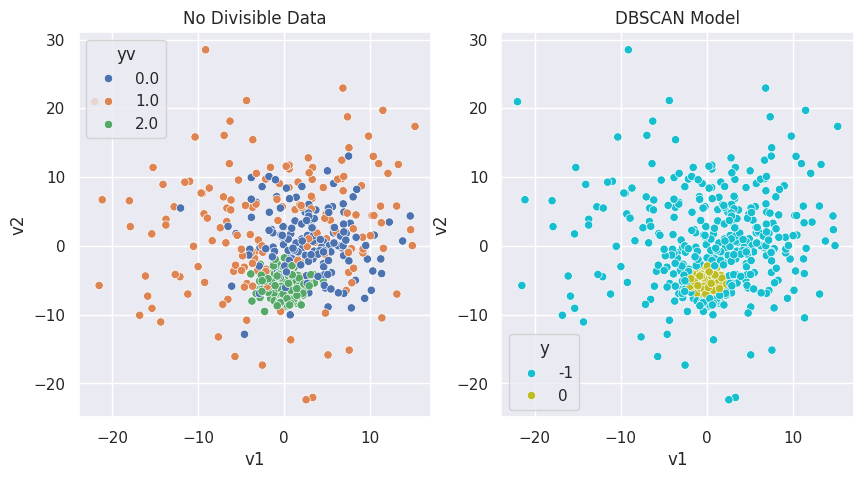

In [16]:
y_predict = DBSCAN(eps = 0.94, min_samples=21).fit_predict(d_copy)
d_copy['y'] = y_predict
fig, ax = plt.subplots(1, 2,  figsize=(10, 5))
sns.scatterplot(data=d_copy, x="v1", y="v2", palette=paleta[::-1], hue='y', ax=ax[1])
ax[1].set_title('DBSCAN Model')
sns.scatterplot(data=data, x="v1", y="v2", palette="deep", hue='yv', ax=ax[0])
ax[0].set_title('No Divisible Data')
plt.show()

# **Entropy Data**
---

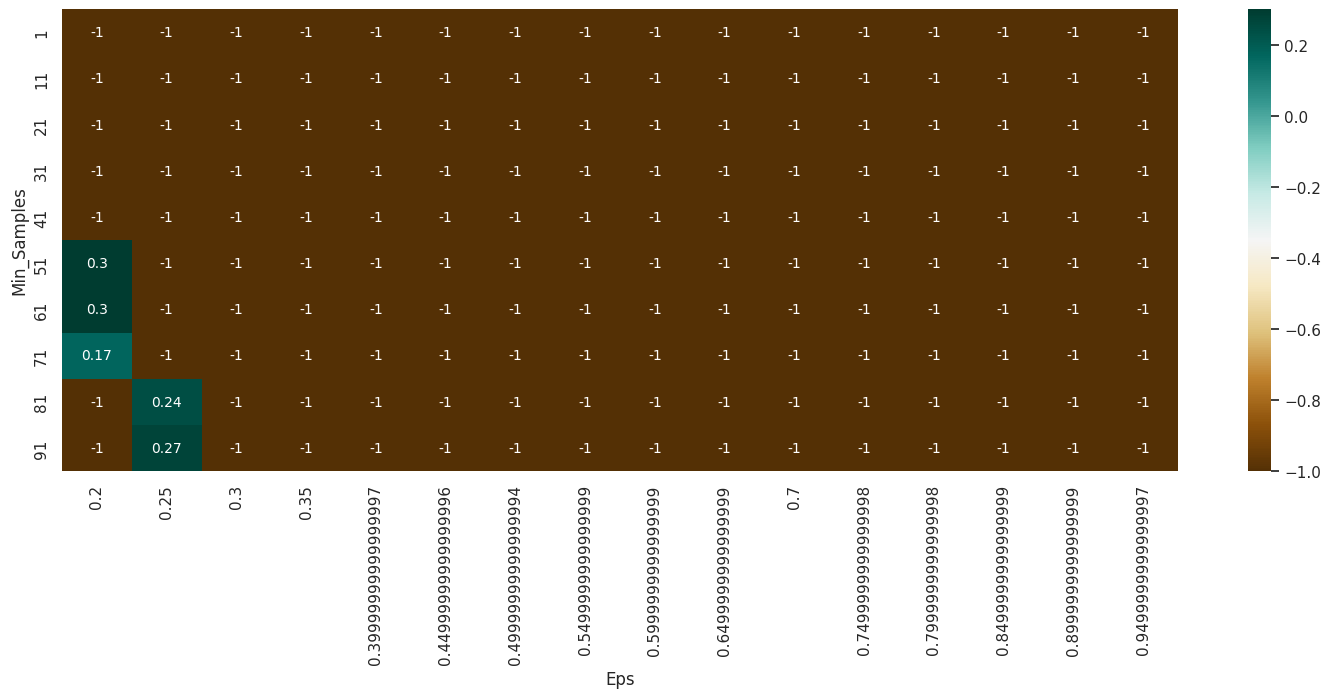

In [17]:
eps_values = np.arange(0.2, 0.99, 0.05)
min_samples = np.arange(1, 100, 10)
d_copy = data.iloc[:, 15:17].copy()
select_params_dbscam(
    d_copy,
    eps_values,
    min_samples,
    silhouette_score
)

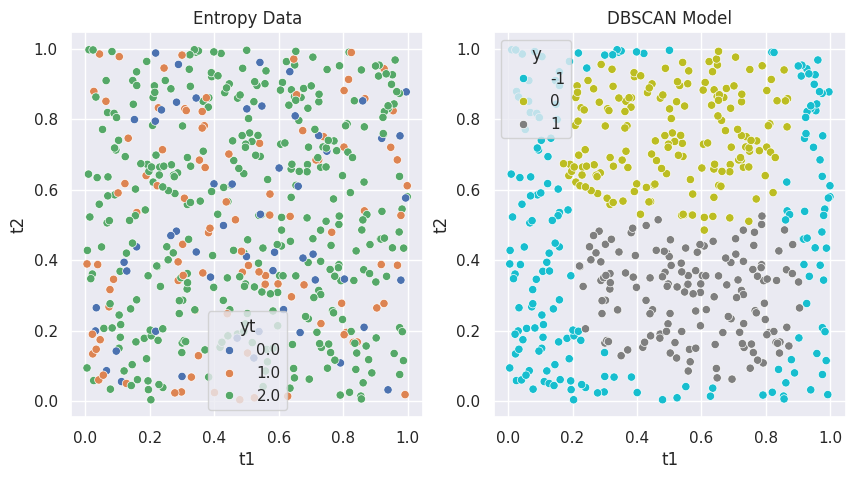

In [19]:
y_predict = DBSCAN(eps = 0.2, min_samples=71).fit_predict(d_copy)
d_copy['y'] = y_predict
fig, ax = plt.subplots(1, 2,  figsize=(10, 5))
sns.scatterplot(data=d_copy, x="t1", y="t2", palette=paleta[::-1], hue='y', ax=ax[1])
ax[1].set_title('DBSCAN Model')
sns.scatterplot(data=data, x="t1", y="t2", palette="deep", hue='yt', ax=ax[0])
ax[0].set_title('Entropy Data')
plt.show()

# **Info**
---

@By: Steven Bernal

@Nickname: Kaiziferr

@Git: https://github.com/Kaiziferr